In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df_household_60 = pd.read_csv("household_data_60min_singleindex.csv")

# Industrial 1

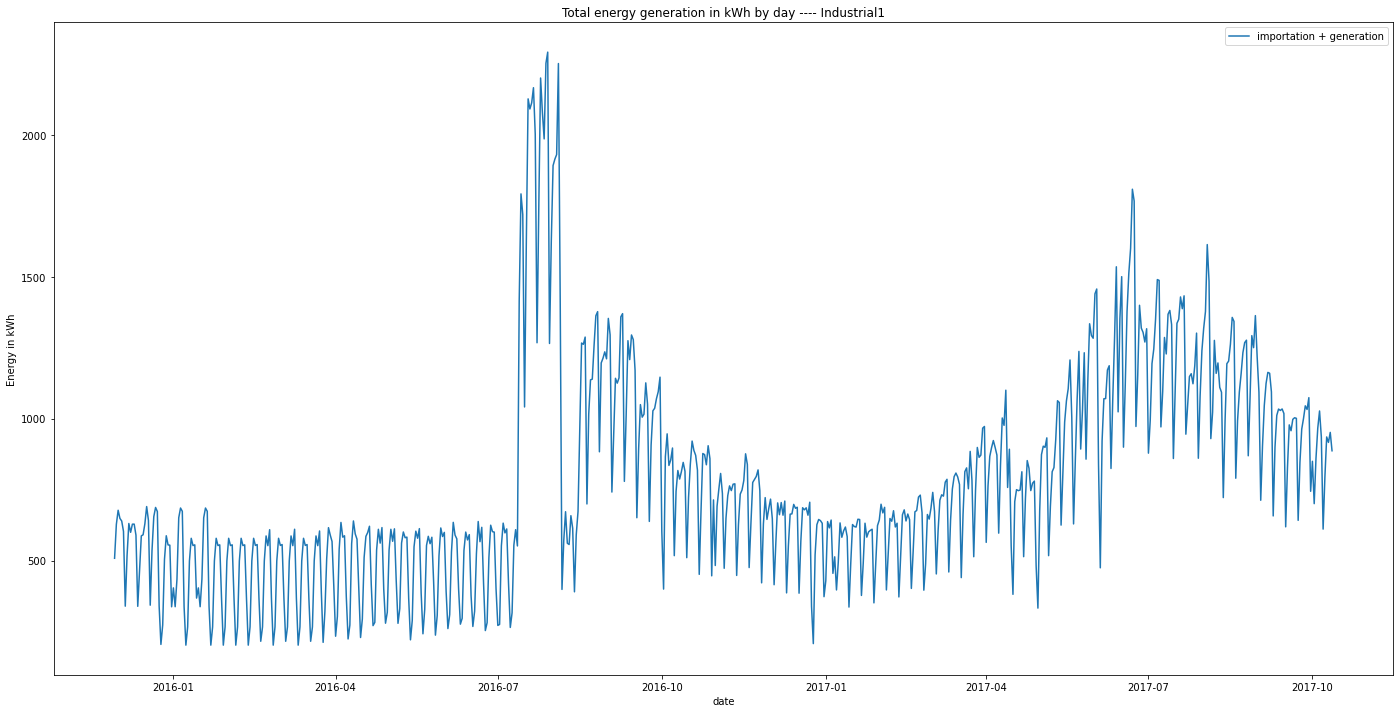

In [3]:
industrial1 = [col for col in df_household_60.columns if 'industrial1' in col]
industrial1 = ['utc_timestamp'] + industrial1
df_ind1 = df_household_60[industrial1]

df_ind1 = pd.DataFrame({'utc_timestamp':df_ind1['utc_timestamp'], 
                            'generation':df_ind1.DE_KN_industrial1_grid_import + df_ind1.DE_KN_industrial1_pv_1
                                         + df_ind1.DE_KN_industrial1_pv_2})

df_ind1 = df_ind1.dropna()
df_ind1['utc_timestamp'] = df_ind1['utc_timestamp'].str[:10]
df_ind1 = df_ind1.groupby(['utc_timestamp'], as_index = False).max()
df_ind1 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2015-11-28', end = '2017-10-12'),
                            'generation':df_ind1.generation})

df_ind1['generation'] = df_ind1['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_ind1.utc_timestamp, df_ind1.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation in kWh by day ---- Industrial1')
ax.legend()

# Industrial 2

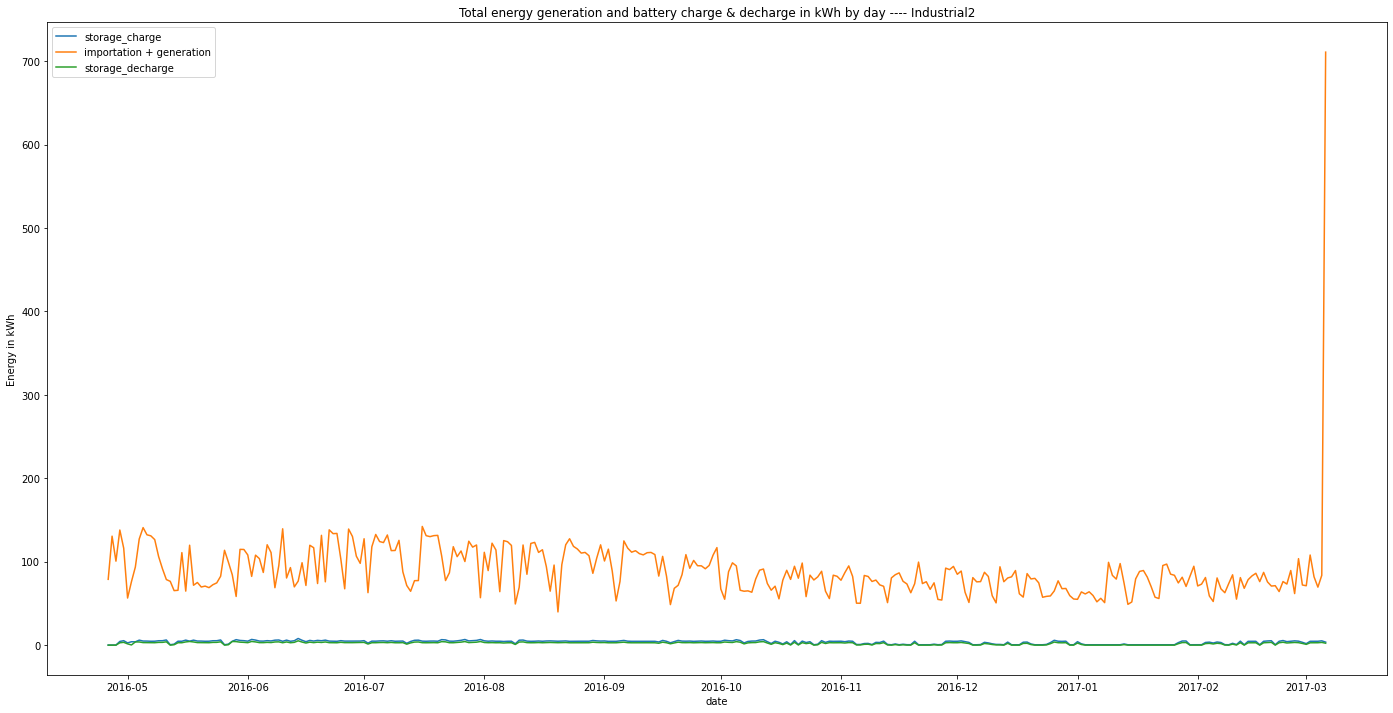

In [4]:
industrial2 = [col for col in df_household_60.columns if 'industrial2' in col]
industrial2 = ['utc_timestamp'] + industrial2
df_ind2 = df_household_60[industrial2]

df_ind2 = pd.DataFrame({'utc_timestamp':df_ind2['utc_timestamp'], 
                            'generation':df_ind2.DE_KN_industrial2_grid_import + df_ind2.DE_KN_industrial2_pv,
                            'storage_charge':df_ind2.DE_KN_industrial2_storage_charge,
                            'storage_decharge':df_ind2.DE_KN_industrial2_storage_decharge})

df_ind2 = df_ind2.dropna()
df_ind2['utc_timestamp'] = df_ind2['utc_timestamp'].str[:10]
df_ind2 = df_ind2.groupby(['utc_timestamp'], as_index = False).max()
df_ind2 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2016-04-25', end = '2017-03-06'),
                            'generation':df_ind2.generation,
                            'storage_charge':df_ind2.storage_charge,
                            'storage_decharge':df_ind2.storage_decharge})
df_ind2['storage_charge'] = df_ind2['storage_charge'].diff(1)
df_ind2['storage_decharge'] = df_ind2['storage_decharge'].diff(1)
df_ind2['generation'] = df_ind2['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_ind2.utc_timestamp, df_ind2.storage_charge, label = 'storage_charge')
ax.plot(df_ind2.utc_timestamp, df_ind2.generation, label = 'importation + generation')
ax.plot(df_ind2.utc_timestamp, df_ind2.storage_decharge, label = 'storage_decharge')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and battery charge & decharge in kWh by day ---- Industrial2')
ax.legend()

# Industrial 3

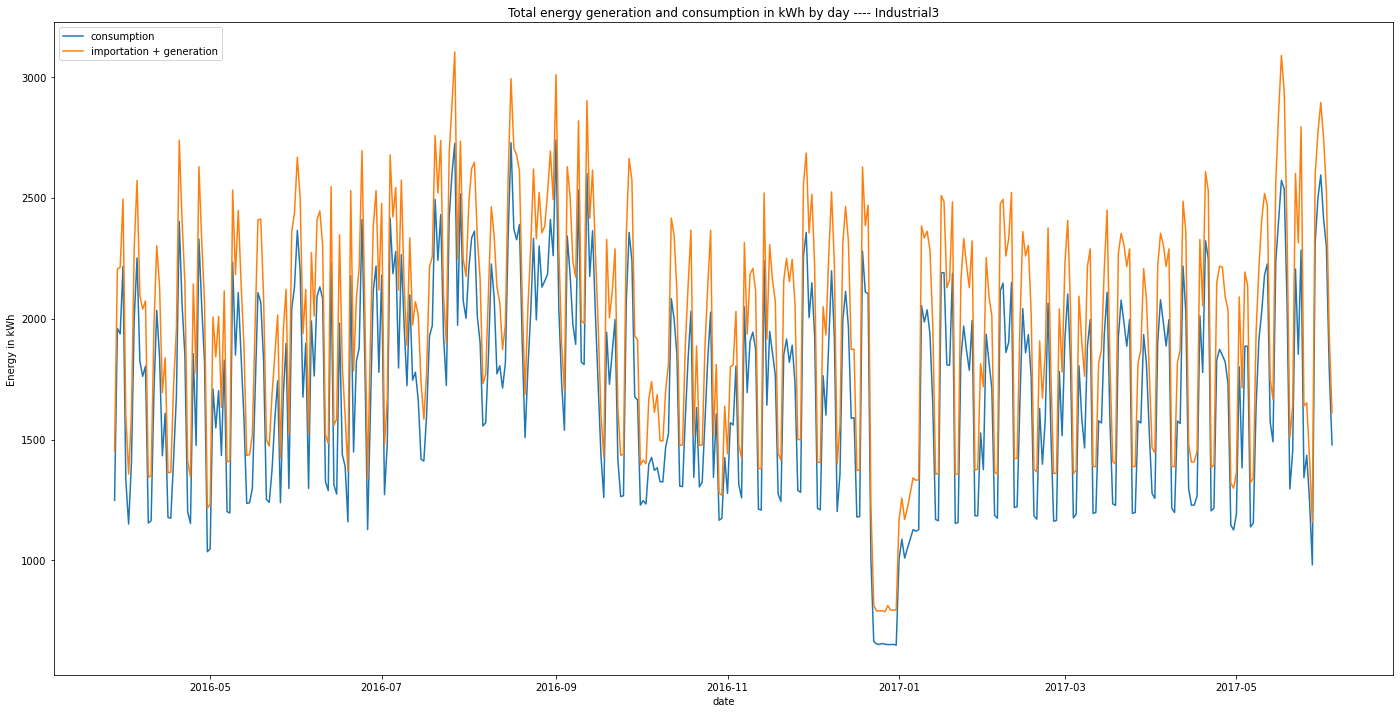

In [5]:
industrial3 = [col for col in df_household_60.columns if 'industrial3' in col]
industrial3 = ['utc_timestamp'] + industrial3
df_ind3 = df_household_60[industrial3]

df_ind3 = pd.DataFrame({'utc_timestamp':df_ind3['utc_timestamp'], 
                            'generation':df_ind3.DE_KN_industrial3_grid_import + df_ind3.DE_KN_industrial3_pv_facade
                                         + df_ind3.DE_KN_industrial3_pv_roof,
                            'consumption':df_ind3.DE_KN_industrial3_area_offices + df_ind3.DE_KN_industrial3_area_room_1
                                         + df_ind3.DE_KN_industrial3_area_room_2 + df_ind3.DE_KN_industrial3_area_room_3
                                         + df_ind3.DE_KN_industrial3_area_room_4 + df_ind3.DE_KN_industrial3_compressor
                                         + df_ind3.DE_KN_industrial3_cooling_aggregate 
                                         + df_ind3.DE_KN_industrial3_cooling_pumps
                                         + df_ind3.DE_KN_industrial3_dishwasher
                                         + df_ind3.DE_KN_industrial3_ev
                                         + df_ind3.DE_KN_industrial3_machine_1 + df_ind3.DE_KN_industrial3_machine_2
                                         + df_ind3.DE_KN_industrial3_machine_3 + df_ind3.DE_KN_industrial3_machine_4
                                         + df_ind3.DE_KN_industrial3_machine_5 + df_ind3.DE_KN_industrial3_refrigerator
                                         + df_ind3.DE_KN_industrial3_ventilation})

df_ind3 = df_ind3.dropna()
df_ind3['utc_timestamp'] = df_ind3['utc_timestamp'].str[:10]
df_ind3 = df_ind3.groupby(['utc_timestamp'], as_index = False).max()
df_ind3 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2016-03-27', end = '2017-06-04'),
                            'generation':df_ind3.generation,
                            'consumption':df_ind3.consumption})
df_ind3['consumption'] = df_ind3['consumption'].diff(1)
df_ind3['generation'] = df_ind3['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_ind3.utc_timestamp, df_ind3.consumption, label = 'consumption')
ax.plot(df_ind3.utc_timestamp, df_ind3.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Industrial3')
ax.legend()

# Residential 1

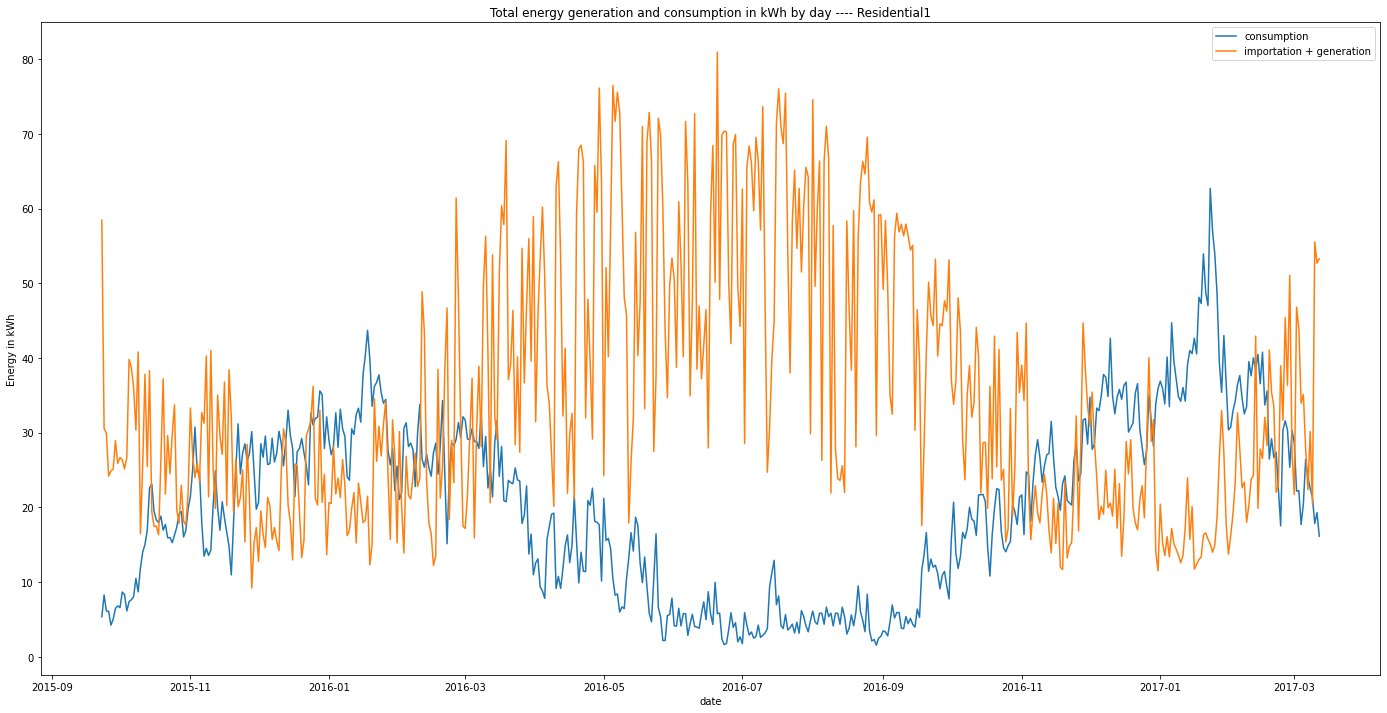

In [6]:
res1 = [col for col in df_household_60.columns if 'residential1' in col]
res1 = ['utc_timestamp'] + res1
df_res1 = df_household_60[res1]

df_res1 = pd.DataFrame({'utc_timestamp':df_res1['utc_timestamp'], 
                            'generation':df_res1.DE_KN_residential1_grid_import
                                         + df_res1.DE_KN_residential1_pv,
                            'consumption':df_res1.DE_KN_residential1_dishwasher 
                                         + df_res1.DE_KN_residential1_freezer
                                         + df_res1.DE_KN_residential1_heat_pump
                                         + df_res1.DE_KN_residential1_washing_machine})
df_res1 = df_res1.dropna()
df_res1['utc_timestamp'] = df_res1['utc_timestamp'].str[:10]
df_res1 = df_res1.groupby(['utc_timestamp'], as_index = False).max()
df_res1 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2015-09-22', end = '2017-03-12'),
                            'generation':df_res1.generation,
                            'consumption':df_res1.consumption})
df_res1['consumption'] = df_res1['consumption'].diff(1)
df_res1['generation'] = df_res1['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res1.utc_timestamp, df_res1.consumption, label = 'consumption')
ax.plot(df_res1.utc_timestamp, df_res1.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential1')
ax.legend()

# Residential 2

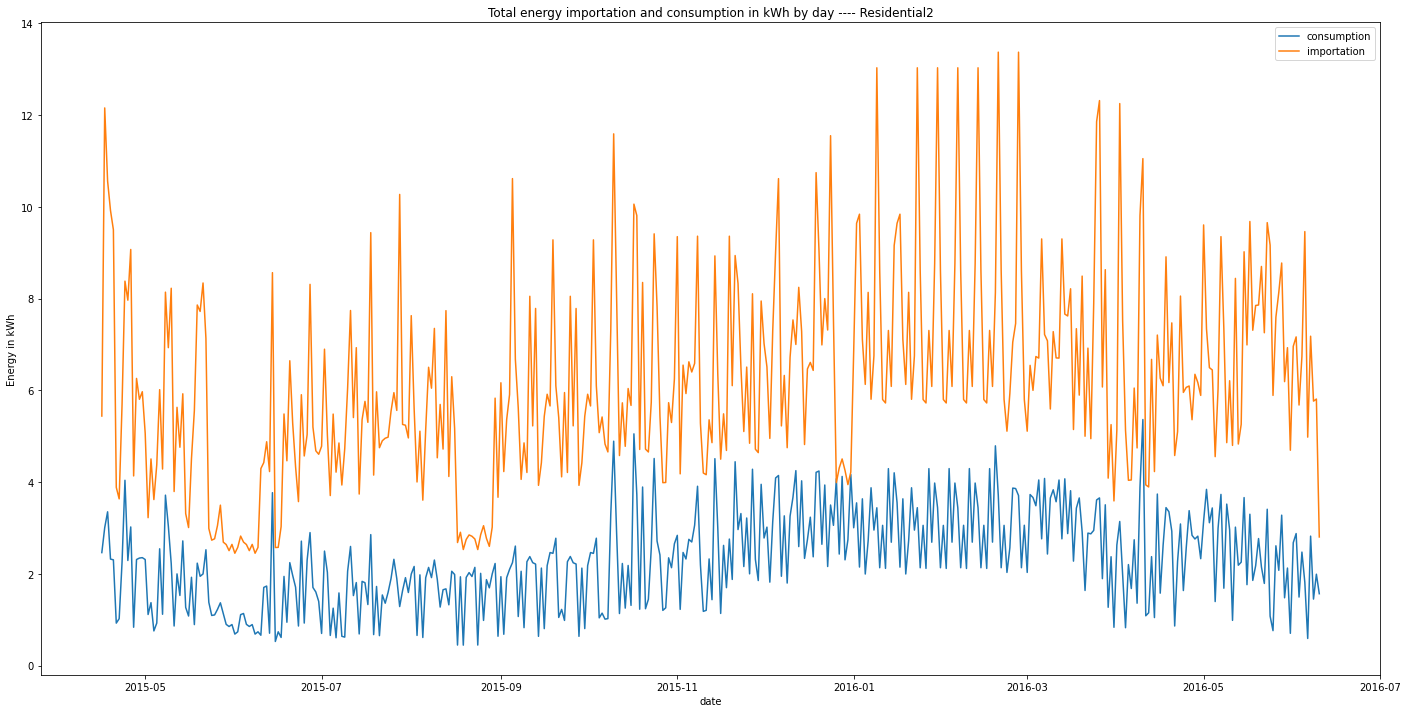

In [7]:
res2 = [col for col in df_household_60.columns if 'residential2' in col]
res2 = ['utc_timestamp'] + res2
df_res2 = df_household_60[res2]

df_res2 = pd.DataFrame({'utc_timestamp':df_res2['utc_timestamp'], 
                            'generation':df_res2.DE_KN_residential2_grid_import,
                            'consumption':df_res2.DE_KN_residential2_circulation_pump 
                                         + df_res2.DE_KN_residential2_dishwasher
                                         + df_res2.DE_KN_residential2_freezer
                                         + df_res2.DE_KN_residential2_washing_machine})
df_res2 = df_res2.dropna()
df_res2['utc_timestamp'] = df_res2['utc_timestamp'].str[:10]
df_res2 = df_res2.groupby(['utc_timestamp'], as_index = False).max()
df_res2 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2015-04-15', end = '2016-06-10'),
                            'generation':df_res2.generation,
                            'consumption':df_res2.consumption})
df_res2['consumption'] = df_res2['consumption'].diff(1)
df_res2['generation'] = df_res2['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res2.utc_timestamp, df_res2.consumption, label = 'consumption')
ax.plot(df_res2.utc_timestamp, df_res2.generation, label = 'importation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy importation and consumption in kWh by day ---- Residential2')
ax.legend()

# Residential 3

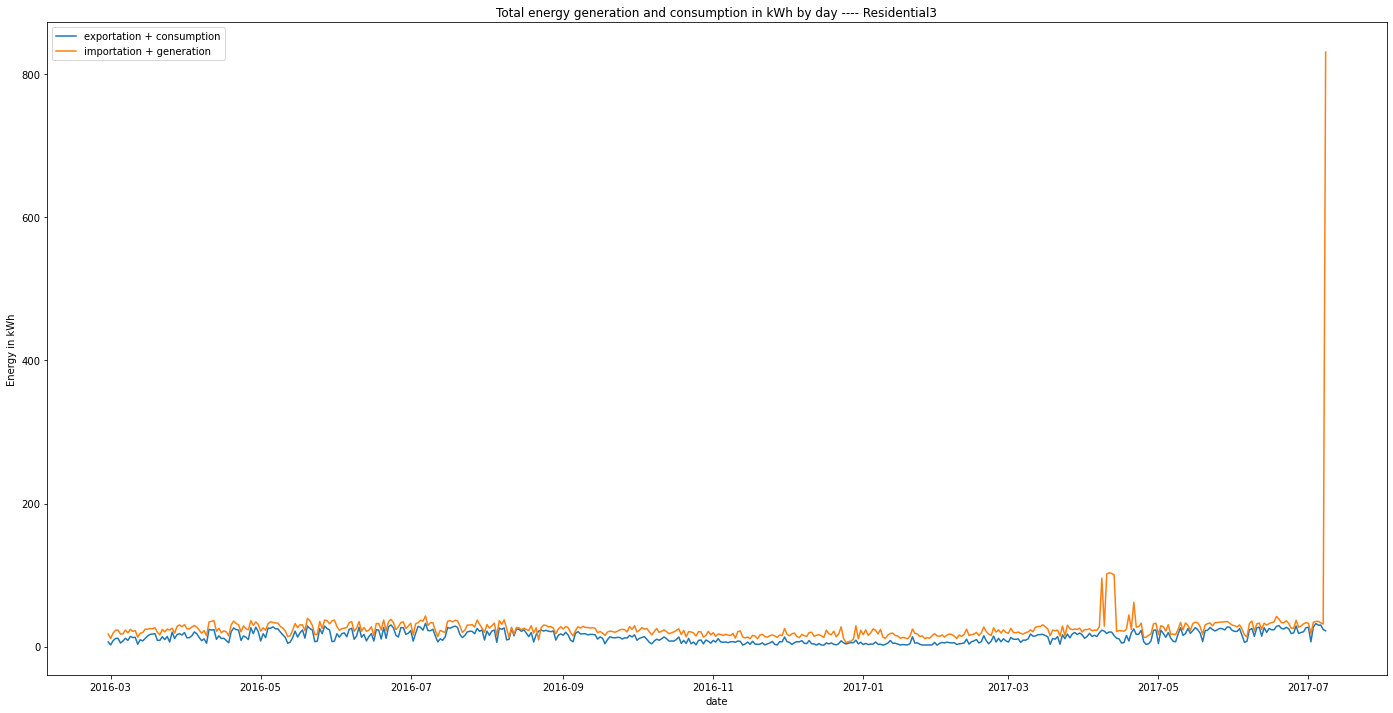

In [8]:
res3 = [col for col in df_household_60.columns if 'residential3' in col]
res3 = ['utc_timestamp'] + res3
df_res3 = df_household_60[res3]

df_res3 = pd.DataFrame({'utc_timestamp':df_res3['utc_timestamp'], 
                            'generation':df_res3.DE_KN_residential3_grid_import
                                         + df_res3.DE_KN_residential3_pv,
                            'consumption':df_res3.DE_KN_residential3_circulation_pump 
                                         + df_res3.DE_KN_residential3_dishwasher
                                         + df_res3.DE_KN_residential3_freezer
                                         + df_res3.DE_KN_residential3_grid_export
                                         + df_res3.DE_KN_residential3_refrigerator
                                         + df_res3.DE_KN_residential3_washing_machine})
df_res3 = df_res3.dropna()
df_res3['utc_timestamp'] = df_res3['utc_timestamp'].str[:10]
df_res3 = df_res3.groupby(['utc_timestamp'], as_index = False).max()
df_res3 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2016-02-28', end = '2017-07-08'),
                            'consumption':df_res3.consumption,
                            'generation':df_res3.generation})
df_res3['consumption'] = df_res3['consumption'].diff(1)
df_res3['generation'] = df_res3['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res3.utc_timestamp, df_res3.consumption, label = 'exportation + consumption')
ax.plot(df_res3.utc_timestamp, df_res3.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential3')
ax.legend()

# Residential 4

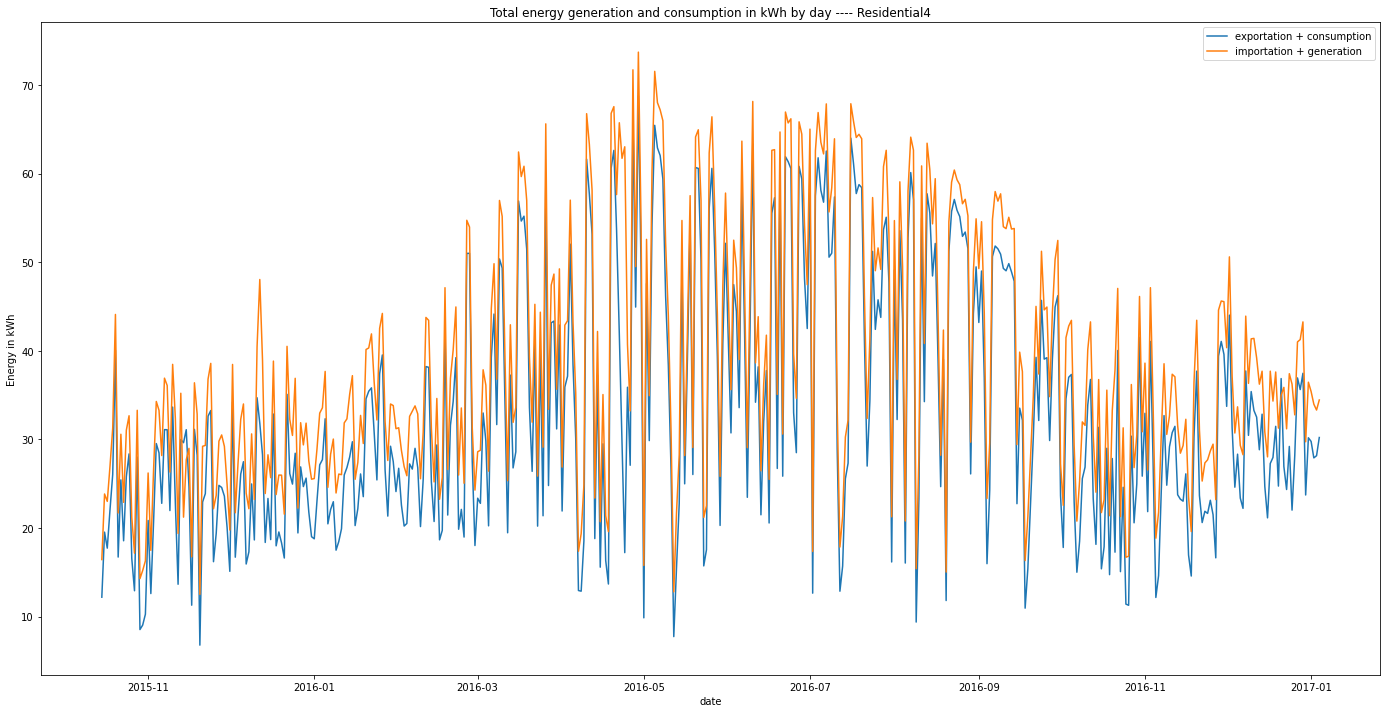

In [9]:
res4 = [col for col in df_household_60.columns if 'residential4' in col]
res4 = ['utc_timestamp'] + res4
df_res4 = df_household_60[res4]

df_res4 = pd.DataFrame({'utc_timestamp':df_res4['utc_timestamp'], 
                            'generation':df_res4.DE_KN_residential4_grid_import
                                         + df_res4.DE_KN_residential4_pv,
                            'consumption':df_res4.DE_KN_residential4_dishwasher 
                                         + df_res4.DE_KN_residential4_ev
                                         + df_res4.DE_KN_residential4_freezer
                                         + df_res4.DE_KN_residential4_grid_export
                                         + df_res4.DE_KN_residential4_heat_pump
                                         + df_res4.DE_KN_residential4_refrigerator
                                         + df_res4.DE_KN_residential4_washing_machine})
df_res4 = df_res4.dropna()
df_res4['utc_timestamp'] = df_res4['utc_timestamp'].str[:10]
df_res4 = df_res4.groupby(['utc_timestamp'], as_index = False).max()
df_res4 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2015-10-14', end = '2017-01-04'),
                            'consumption':df_res4.consumption,
                            'generation':df_res4.generation})
df_res4['consumption'] = df_res4['consumption'].diff(1)
df_res4['generation'] = df_res4['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res4.utc_timestamp, df_res4.consumption, label = 'exportation + consumption')
ax.plot(df_res4.utc_timestamp, df_res4.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential4')
ax.legend()

# Residential 5

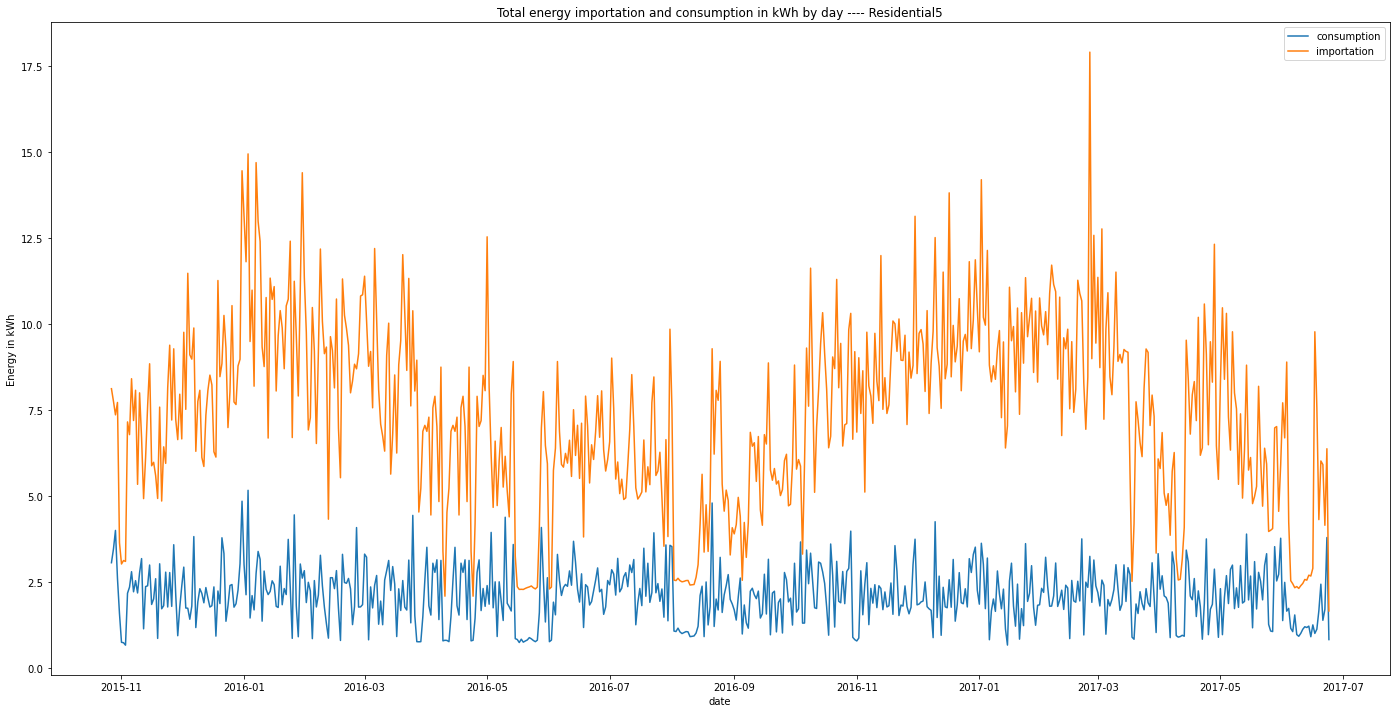

In [10]:
res5 = [col for col in df_household_60.columns if 'residential5' in col]
res5 = ['utc_timestamp'] + res5
df_res5 = df_household_60[res5]

df_res5 = pd.DataFrame({'utc_timestamp':df_res5['utc_timestamp'], 
                            'generation':df_res5.DE_KN_residential5_grid_import,
                            'consumption':df_res5.DE_KN_residential5_dishwasher 
                                         + df_res5.DE_KN_residential5_refrigerator
                                         + df_res5.DE_KN_residential5_washing_machine})
df_res5 = df_res5.dropna()
df_res5['utc_timestamp'] = df_res5['utc_timestamp'].str[:10]
df_res5 = df_res5.groupby(['utc_timestamp'], as_index = False).max()
df_res5 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2015-10-26', end = '2017-06-24'),
                            'consumption':df_res5.consumption,
                            'generation':df_res5.generation})
df_res5['consumption'] = df_res5['consumption'].diff(1)
df_res5['generation'] = df_res5['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res5.utc_timestamp, df_res5.consumption, label = 'consumption')
ax.plot(df_res5.utc_timestamp, df_res5.generation, label = 'importation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy importation and consumption in kWh by day ---- Residential5')
ax.legend()

# Residential 6

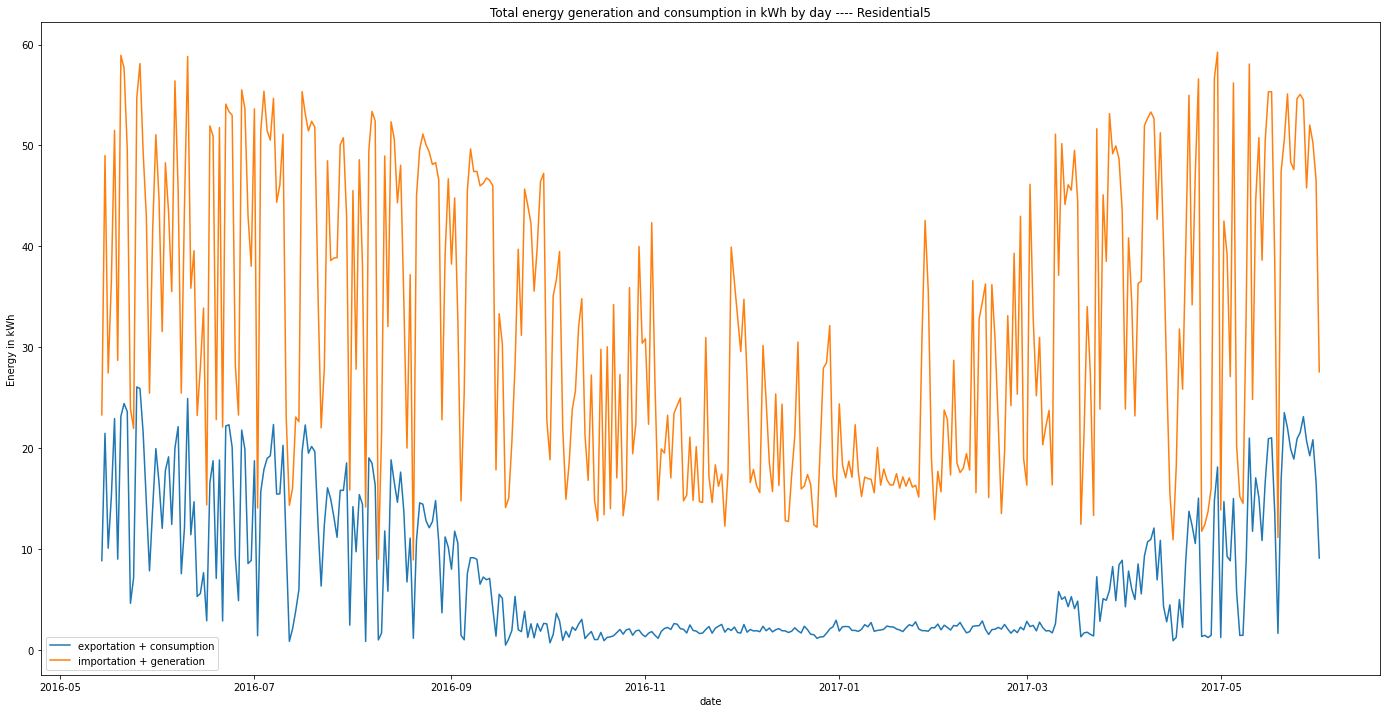

In [11]:
res6 = [col for col in df_household_60.columns if 'residential6' in col]
res6 = ['utc_timestamp'] + res6
df_res6 = df_household_60[res6]

df_res6 = pd.DataFrame({'utc_timestamp':df_res6['utc_timestamp'], 
                            'generation':df_res6.DE_KN_residential6_grid_import
                                         + df_res6.DE_KN_residential6_pv,
                            'consumption':df_res6.DE_KN_residential6_circulation_pump 
                                         + df_res6.DE_KN_residential6_dishwasher
                                         + df_res6.DE_KN_residential6_freezer
                                         + df_res6.DE_KN_residential6_grid_export
                                         + df_res6.DE_KN_residential6_washing_machine})
df_res6 = df_res6.dropna()
df_res6['utc_timestamp'] = df_res6['utc_timestamp'].str[:10]
df_res6 = df_res6.groupby(['utc_timestamp'], as_index = False).max()
df_res6 = pd.DataFrame({'utc_timestamp':pd.date_range(start = '2016-05-13', end = '2017-06-01'),
                            'consumption':df_res6.consumption,
                            'generation':df_res6.generation})
df_res6['consumption'] = df_res6['consumption'].diff(1)
df_res6['generation'] = df_res6['generation'].diff(1)

fig, ax = plt.subplots(figsize = (24,12))
ax.plot(df_res6.utc_timestamp, df_res6.consumption, label = 'exportation + consumption')
ax.plot(df_res6.utc_timestamp, df_res6.generation, label = 'importation + generation')
ax.set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential6')
ax.legend()

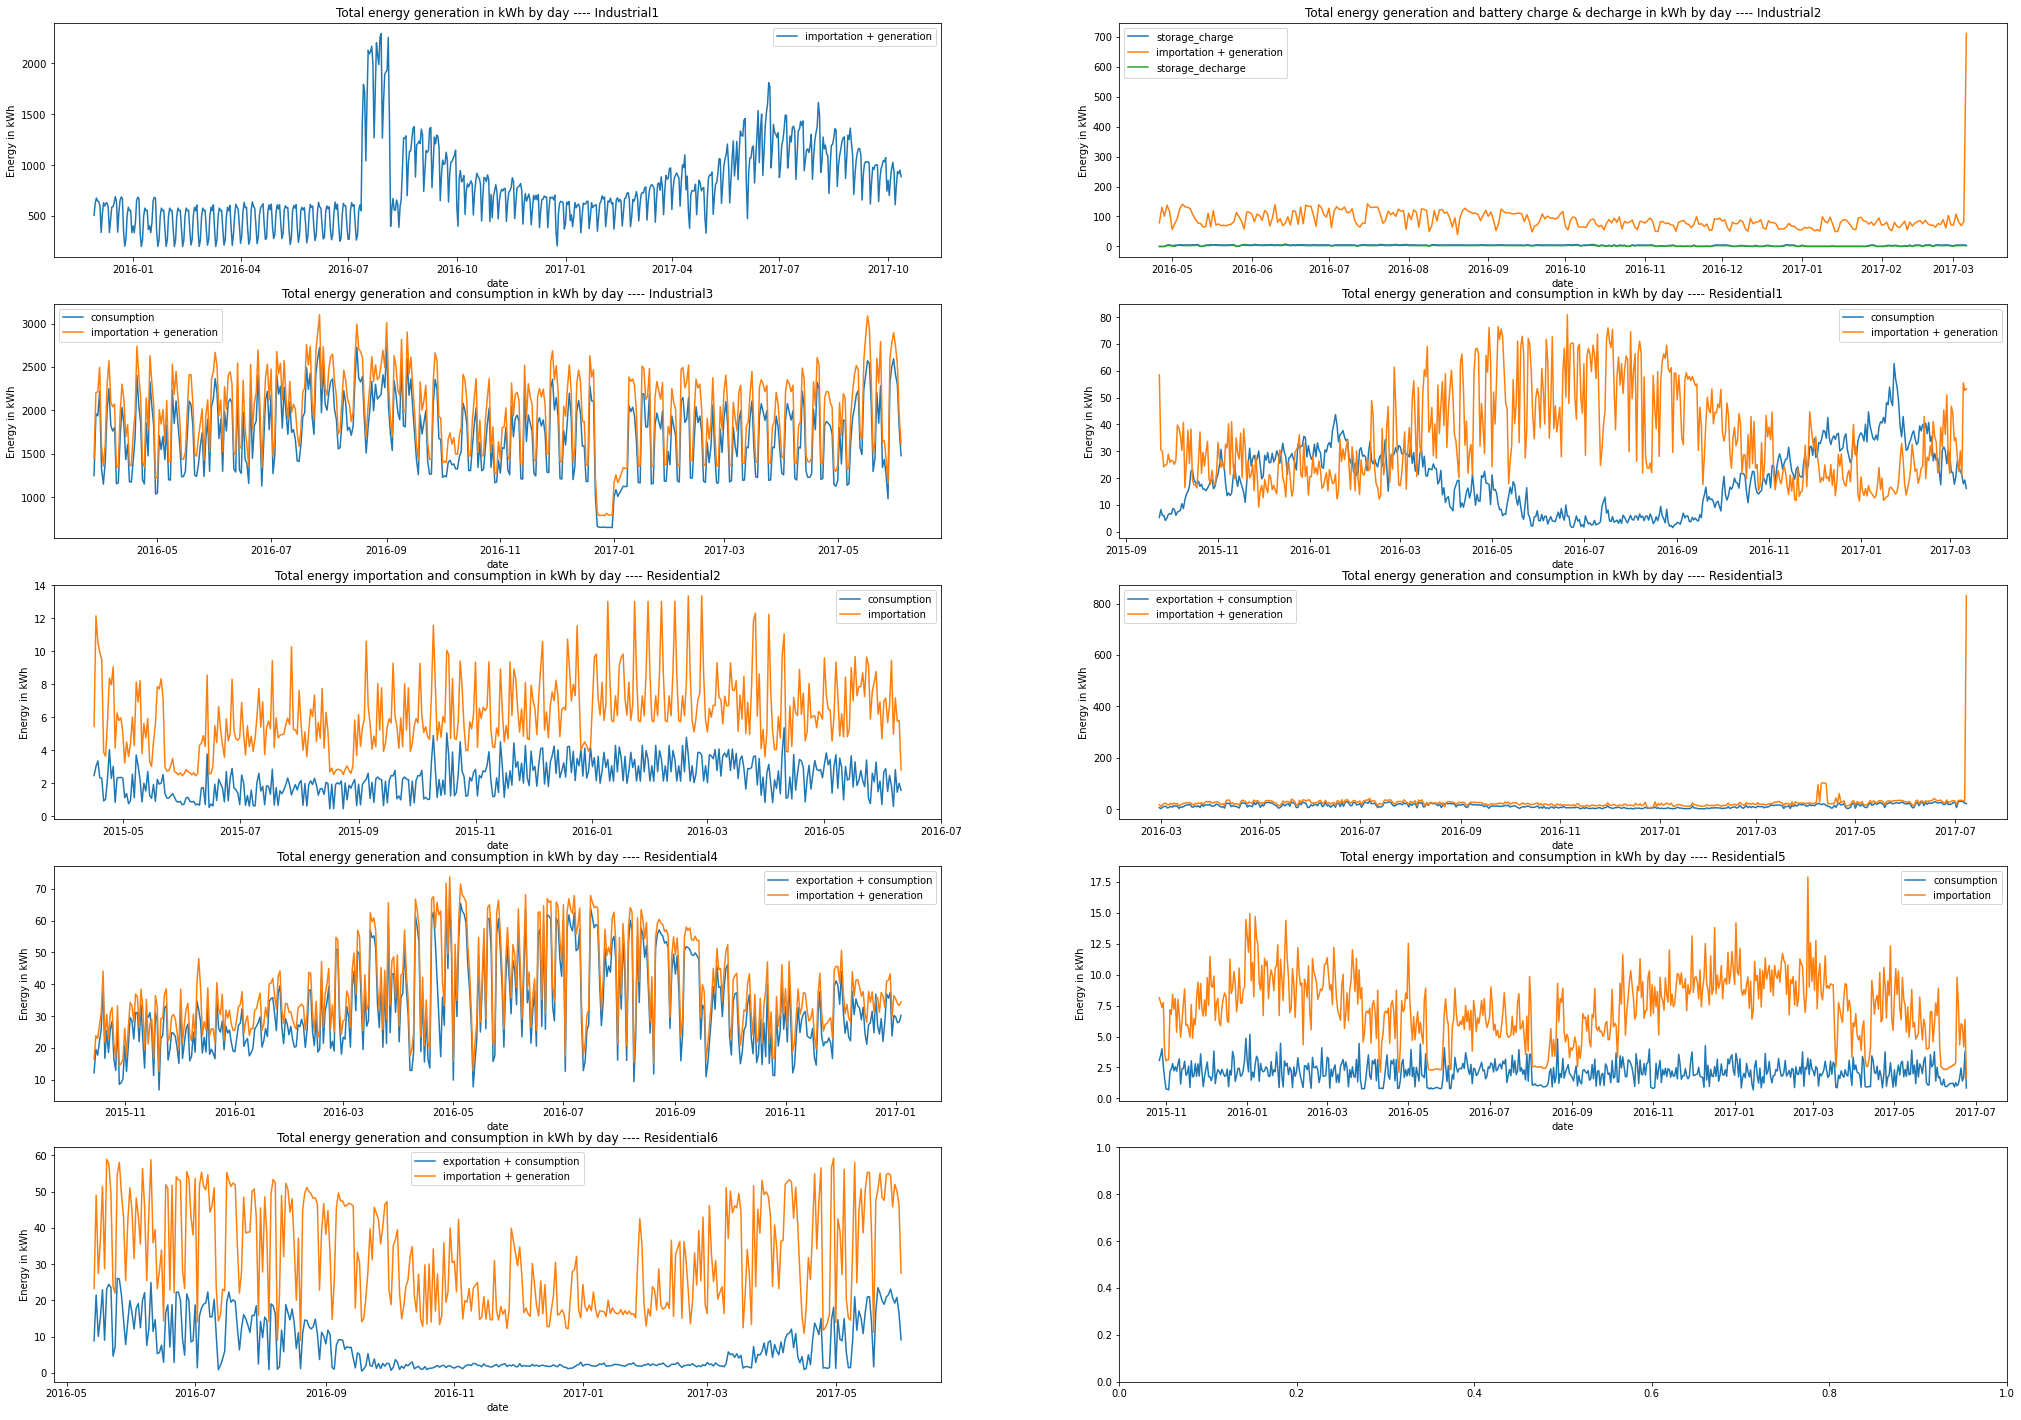

In [37]:
fig, ax = plt.subplots(5,2,figsize = (35,25))
ax[0,0].plot(df_ind1.utc_timestamp, df_ind1.generation, label = 'importation + generation')
ax[0,0].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation in kWh by day ---- Industrial1')
ax[0,0].legend()

ax[0,1].plot(df_ind2.utc_timestamp, df_ind2.storage_charge, label = 'storage_charge')
ax[0,1].plot(df_ind2.utc_timestamp, df_ind2.generation, label = 'importation + generation')
ax[0,1].plot(df_ind2.utc_timestamp, df_ind2.storage_decharge, label = 'storage_decharge')
ax[0,1].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and battery charge & decharge in kWh by day ---- Industrial2')
ax[0,1].legend()

ax[1,0].plot(df_ind3.utc_timestamp, df_ind3.consumption, label = 'consumption')
ax[1,0].plot(df_ind3.utc_timestamp, df_ind3.generation, label = 'importation + generation')
ax[1,0].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Industrial3')
ax[1,0].legend()

ax[1,1].plot(df_res1.utc_timestamp, df_res1.consumption, label = 'consumption')
ax[1,1].plot(df_res1.utc_timestamp, df_res1.generation, label = 'importation + generation')
ax[1,1].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential1')
ax[1,1].legend()

ax[2,0].plot(df_res2.utc_timestamp, df_res2.consumption, label = 'consumption')
ax[2,0].plot(df_res2.utc_timestamp, df_res2.generation, label = 'importation')
ax[2,0].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy importation and consumption in kWh by day ---- Residential2')
ax[2,0].legend()

ax[2,1].plot(df_res3.utc_timestamp, df_res3.consumption, label = 'exportation + consumption')
ax[2,1].plot(df_res3.utc_timestamp, df_res3.generation, label = 'importation + generation')
ax[2,1].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential3')
ax[2,1].legend()

ax[3,0].plot(df_res4.utc_timestamp, df_res4.consumption, label = 'exportation + consumption')
ax[3,0].plot(df_res4.utc_timestamp, df_res4.generation, label = 'importation + generation')
ax[3,0].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential4')
ax[3,0].legend()

ax[3,1].plot(df_res5.utc_timestamp, df_res5.consumption, label = 'consumption')
ax[3,1].plot(df_res5.utc_timestamp, df_res5.generation, label = 'importation')
ax[3,1].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy importation and consumption in kWh by day ---- Residential5')
ax[3,1].legend()

ax[4,0].plot(df_res6.utc_timestamp, df_res6.consumption, label = 'exportation + consumption')
ax[4,0].plot(df_res6.utc_timestamp, df_res6.generation, label = 'importation + generation')
ax[4,0].set(xlabel = 'date', ylabel = 'Energy in kWh', title = 'Total energy generation and consumption in kWh by day ---- Residential6')
ax[4,0].legend()